# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [37]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

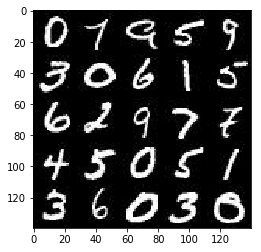

In [38]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

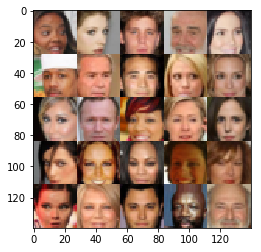

In [39]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [40]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [41]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, [], name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [69]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    stddev = 0.02
    with tf.variable_scope('discriminator', reuse=reuse):

        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(mean = 0, stddev = stddev))
        relu1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(mean = 0, stddev = stddev))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(mean = 0, stddev = stddev))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [70]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
        
    alpha = 0.2
    stddev = 0.02
    with tf.variable_scope('generator', reuse=not(is_train)):
        
        x1 = tf.layers.dense(z, 7*7*256)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(mean = 0, stddev = stddev))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)

        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(mean = 0, stddev = stddev))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)

        # Output layer        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [71]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [72]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)  
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [73]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
       
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [74]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model  
    input_real, input_z, lr_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)    
    
    out_channel_dim = data_shape[3]
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            
            steps = 0
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_rate: learning_rate, input_real: batch_images})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_rate: learning_rate, input_real: batch_images})
                              
                if steps % 10 == 0:
                    
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Steps {}/{}...".format(steps, epoch_i + 1),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, out_channel_dim, data_image_mode)  
        
            print ("After epoch")
            show_generator_output(sess, 16, input_z, out_channel_dim, data_image_mode)
            
    print ("Done")
    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Steps 10/1... Discriminator Loss: 2.5395... Generator Loss: 0.3942
Steps 20/1... Discriminator Loss: 2.2445... Generator Loss: 0.2223
Steps 30/1... Discriminator Loss: 1.9424... Generator Loss: 0.6903
Steps 40/1... Discriminator Loss: 1.7928... Generator Loss: 0.7849
Steps 50/1... Discriminator Loss: 1.7519... Generator Loss: 1.1015
Steps 60/1... Discriminator Loss: 1.5876... Generator Loss: 0.9663
Steps 70/1... Discriminator Loss: 1.5896... Generator Loss: 0.8068
Steps 80/1... Discriminator Loss: 1.5023... Generator Loss: 0.9275
Steps 90/1... Discriminator Loss: 1.3926... Generator Loss: 0.7401
Steps 100/1... Discriminator Loss: 1.6596... Generator Loss: 0.3577


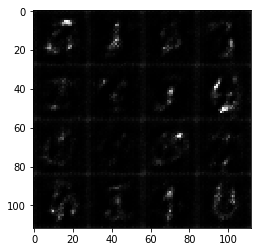

Steps 110/1... Discriminator Loss: 1.3894... Generator Loss: 1.1530
Steps 120/1... Discriminator Loss: 1.2859... Generator Loss: 0.9115
Steps 130/1... Discriminator Loss: 1.3372... Generator Loss: 1.0095
Steps 140/1... Discriminator Loss: 1.3928... Generator Loss: 0.5316
Steps 150/1... Discriminator Loss: 1.2692... Generator Loss: 0.7099
Steps 160/1... Discriminator Loss: 1.2051... Generator Loss: 0.8412
Steps 170/1... Discriminator Loss: 1.1647... Generator Loss: 0.7969
Steps 180/1... Discriminator Loss: 1.2304... Generator Loss: 1.2886
Steps 190/1... Discriminator Loss: 1.4807... Generator Loss: 0.4372
Steps 200/1... Discriminator Loss: 1.1949... Generator Loss: 0.8272


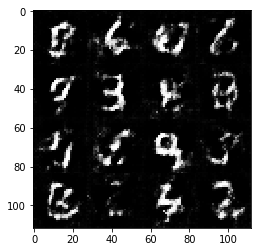

Steps 210/1... Discriminator Loss: 1.3039... Generator Loss: 1.4280
Steps 220/1... Discriminator Loss: 1.2909... Generator Loss: 0.9275
Steps 230/1... Discriminator Loss: 1.3559... Generator Loss: 1.1946
Steps 240/1... Discriminator Loss: 1.5805... Generator Loss: 1.4856
Steps 250/1... Discriminator Loss: 1.3414... Generator Loss: 1.0906
Steps 260/1... Discriminator Loss: 1.5153... Generator Loss: 1.7008
Steps 270/1... Discriminator Loss: 1.4017... Generator Loss: 0.6373
Steps 280/1... Discriminator Loss: 1.4557... Generator Loss: 0.5133
Steps 290/1... Discriminator Loss: 1.4104... Generator Loss: 0.7142
Steps 300/1... Discriminator Loss: 1.3100... Generator Loss: 1.0669


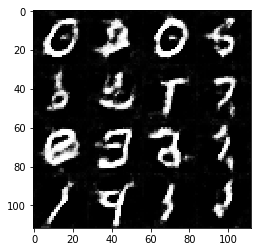

Steps 310/1... Discriminator Loss: 1.3392... Generator Loss: 0.6862
Steps 320/1... Discriminator Loss: 1.3324... Generator Loss: 1.0484
Steps 330/1... Discriminator Loss: 1.5060... Generator Loss: 0.4834
Steps 340/1... Discriminator Loss: 1.2758... Generator Loss: 1.0422
Steps 350/1... Discriminator Loss: 1.4817... Generator Loss: 0.4831
Steps 360/1... Discriminator Loss: 1.3265... Generator Loss: 0.9776
Steps 370/1... Discriminator Loss: 1.3045... Generator Loss: 0.9540
Steps 380/1... Discriminator Loss: 1.3664... Generator Loss: 0.5717
Steps 390/1... Discriminator Loss: 1.3470... Generator Loss: 0.6703
Steps 400/1... Discriminator Loss: 1.2749... Generator Loss: 0.8011


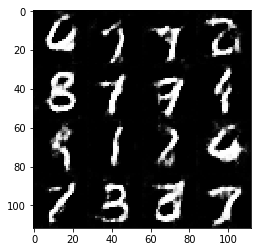

Steps 410/1... Discriminator Loss: 1.7057... Generator Loss: 1.8275
Steps 420/1... Discriminator Loss: 1.3080... Generator Loss: 0.8248
Steps 430/1... Discriminator Loss: 1.2130... Generator Loss: 0.9993
Steps 440/1... Discriminator Loss: 1.2519... Generator Loss: 0.8402
Steps 450/1... Discriminator Loss: 1.3345... Generator Loss: 0.6429
Steps 460/1... Discriminator Loss: 1.3919... Generator Loss: 1.2875
After epoch


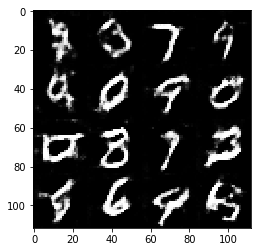

Steps 10/2... Discriminator Loss: 1.3139... Generator Loss: 0.6808
Steps 20/2... Discriminator Loss: 1.2671... Generator Loss: 1.2340
Steps 30/2... Discriminator Loss: 1.3975... Generator Loss: 1.3348
Steps 40/2... Discriminator Loss: 1.2336... Generator Loss: 1.0750
Steps 50/2... Discriminator Loss: 1.3011... Generator Loss: 0.8458
Steps 60/2... Discriminator Loss: 1.2441... Generator Loss: 0.8330
Steps 70/2... Discriminator Loss: 1.2384... Generator Loss: 0.9963
Steps 80/2... Discriminator Loss: 1.2861... Generator Loss: 1.2040
Steps 90/2... Discriminator Loss: 1.2529... Generator Loss: 0.9190
Steps 100/2... Discriminator Loss: 1.2539... Generator Loss: 0.9256


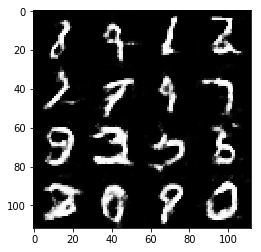

Steps 110/2... Discriminator Loss: 1.4863... Generator Loss: 0.4545
Steps 120/2... Discriminator Loss: 1.2105... Generator Loss: 0.9507
Steps 130/2... Discriminator Loss: 1.3422... Generator Loss: 0.6979
Steps 140/2... Discriminator Loss: 1.3057... Generator Loss: 1.0646
Steps 150/2... Discriminator Loss: 1.2968... Generator Loss: 0.8201
Steps 160/2... Discriminator Loss: 1.2952... Generator Loss: 0.9875
Steps 170/2... Discriminator Loss: 1.3005... Generator Loss: 0.6512
Steps 180/2... Discriminator Loss: 1.2946... Generator Loss: 0.6302
Steps 190/2... Discriminator Loss: 1.4063... Generator Loss: 0.5687
Steps 200/2... Discriminator Loss: 1.3438... Generator Loss: 1.2107


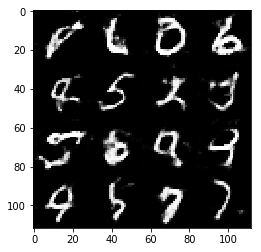

Steps 210/2... Discriminator Loss: 1.2651... Generator Loss: 0.8876
Steps 220/2... Discriminator Loss: 1.7851... Generator Loss: 1.5460
Steps 230/2... Discriminator Loss: 1.3459... Generator Loss: 0.6178
Steps 240/2... Discriminator Loss: 1.2670... Generator Loss: 0.7942
Steps 250/2... Discriminator Loss: 1.2559... Generator Loss: 1.0517
Steps 260/2... Discriminator Loss: 1.3533... Generator Loss: 0.5459
Steps 270/2... Discriminator Loss: 1.2478... Generator Loss: 0.7256
Steps 280/2... Discriminator Loss: 1.4123... Generator Loss: 0.5339
Steps 290/2... Discriminator Loss: 1.3780... Generator Loss: 0.7822
Steps 300/2... Discriminator Loss: 1.2719... Generator Loss: 0.7952


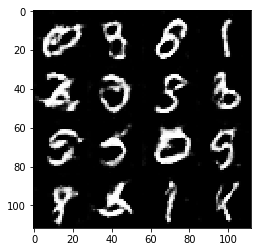

Steps 310/2... Discriminator Loss: 1.2770... Generator Loss: 0.6591
Steps 320/2... Discriminator Loss: 1.2507... Generator Loss: 0.9692
Steps 330/2... Discriminator Loss: 1.1988... Generator Loss: 0.8550
Steps 340/2... Discriminator Loss: 1.3327... Generator Loss: 0.6211
Steps 350/2... Discriminator Loss: 1.2459... Generator Loss: 1.0463
Steps 360/2... Discriminator Loss: 1.9314... Generator Loss: 1.8284
Steps 370/2... Discriminator Loss: 1.4018... Generator Loss: 0.9294
Steps 380/2... Discriminator Loss: 1.3189... Generator Loss: 0.6100
Steps 390/2... Discriminator Loss: 1.2406... Generator Loss: 0.7881
Steps 400/2... Discriminator Loss: 1.2760... Generator Loss: 0.6881


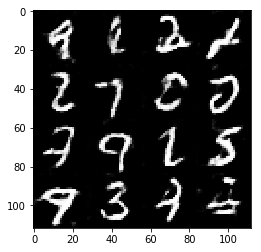

Steps 410/2... Discriminator Loss: 1.2884... Generator Loss: 0.6569
Steps 420/2... Discriminator Loss: 1.4625... Generator Loss: 0.5028
Steps 430/2... Discriminator Loss: 1.3236... Generator Loss: 0.8236
Steps 440/2... Discriminator Loss: 1.2224... Generator Loss: 0.8765
Steps 450/2... Discriminator Loss: 1.2029... Generator Loss: 0.8130
Steps 460/2... Discriminator Loss: 1.2991... Generator Loss: 1.0548
After epoch


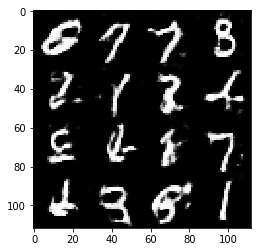

Done


In [75]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Steps 10/1... Discriminator Loss: 2.5950... Generator Loss: 0.1966
Steps 20/1... Discriminator Loss: 1.7911... Generator Loss: 2.0263
Steps 30/1... Discriminator Loss: 1.7907... Generator Loss: 0.4173
Steps 40/1... Discriminator Loss: 1.4921... Generator Loss: 1.4125
Steps 50/1... Discriminator Loss: 1.9949... Generator Loss: 0.4447
Steps 60/1... Discriminator Loss: 1.9782... Generator Loss: 0.3837
Steps 70/1... Discriminator Loss: 1.9292... Generator Loss: 0.4773
Steps 80/1... Discriminator Loss: 1.6607... Generator Loss: 0.6390
Steps 90/1... Discriminator Loss: 1.5419... Generator Loss: 0.6686
Steps 100/1... Discriminator Loss: 1.6336... Generator Loss: 0.6765


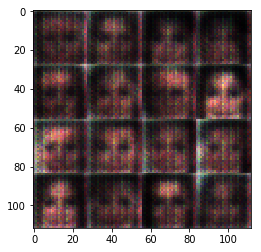

Steps 110/1... Discriminator Loss: 1.7538... Generator Loss: 0.6311
Steps 120/1... Discriminator Loss: 1.6158... Generator Loss: 0.6986
Steps 130/1... Discriminator Loss: 1.6357... Generator Loss: 0.5948
Steps 140/1... Discriminator Loss: 1.4823... Generator Loss: 0.7816
Steps 150/1... Discriminator Loss: 1.4494... Generator Loss: 0.7316
Steps 160/1... Discriminator Loss: 1.4002... Generator Loss: 0.7907
Steps 170/1... Discriminator Loss: 1.3715... Generator Loss: 0.8565
Steps 180/1... Discriminator Loss: 1.5271... Generator Loss: 0.6771
Steps 190/1... Discriminator Loss: 1.4961... Generator Loss: 0.5286
Steps 200/1... Discriminator Loss: 1.1324... Generator Loss: 1.2486


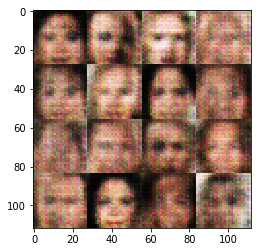

Steps 210/1... Discriminator Loss: 1.5228... Generator Loss: 0.6908
Steps 220/1... Discriminator Loss: 1.5719... Generator Loss: 2.1369
Steps 230/1... Discriminator Loss: 1.4538... Generator Loss: 0.6878
Steps 240/1... Discriminator Loss: 1.5238... Generator Loss: 0.5219
Steps 250/1... Discriminator Loss: 2.1012... Generator Loss: 0.2401
Steps 260/1... Discriminator Loss: 1.8747... Generator Loss: 0.3463
Steps 270/1... Discriminator Loss: 1.4305... Generator Loss: 0.7460
Steps 280/1... Discriminator Loss: 1.4689... Generator Loss: 2.1821
Steps 290/1... Discriminator Loss: 1.5022... Generator Loss: 0.9374
Steps 300/1... Discriminator Loss: 1.3201... Generator Loss: 1.0728


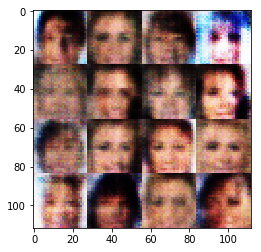

Steps 310/1... Discriminator Loss: 1.3128... Generator Loss: 1.2040
Steps 320/1... Discriminator Loss: 1.4908... Generator Loss: 0.6507
Steps 330/1... Discriminator Loss: 1.7275... Generator Loss: 0.4341
Steps 340/1... Discriminator Loss: 1.5645... Generator Loss: 0.7333
Steps 350/1... Discriminator Loss: 1.2680... Generator Loss: 1.0133
Steps 360/1... Discriminator Loss: 1.1726... Generator Loss: 1.2305
Steps 370/1... Discriminator Loss: 1.3132... Generator Loss: 0.9576
Steps 380/1... Discriminator Loss: 1.3763... Generator Loss: 0.7320
Steps 390/1... Discriminator Loss: 1.1076... Generator Loss: 1.7123
Steps 400/1... Discriminator Loss: 1.2383... Generator Loss: 1.4069


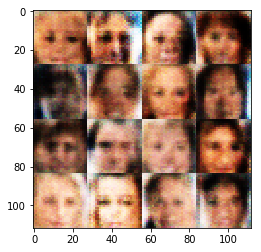

Steps 410/1... Discriminator Loss: 1.4201... Generator Loss: 0.7640
Steps 420/1... Discriminator Loss: 1.4561... Generator Loss: 0.6118
Steps 430/1... Discriminator Loss: 1.1991... Generator Loss: 1.8439
Steps 440/1... Discriminator Loss: 1.6733... Generator Loss: 0.3989
Steps 450/1... Discriminator Loss: 1.3321... Generator Loss: 0.6383
Steps 460/1... Discriminator Loss: 0.9833... Generator Loss: 1.1651
Steps 470/1... Discriminator Loss: 1.4883... Generator Loss: 0.4993
Steps 480/1... Discriminator Loss: 1.3601... Generator Loss: 0.6947
Steps 490/1... Discriminator Loss: 1.2176... Generator Loss: 1.2689
Steps 500/1... Discriminator Loss: 1.4897... Generator Loss: 0.6125


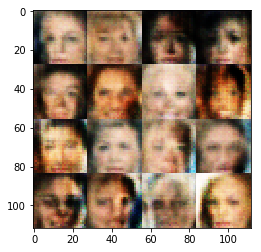

Steps 510/1... Discriminator Loss: 1.1690... Generator Loss: 2.3385
Steps 520/1... Discriminator Loss: 1.2817... Generator Loss: 1.1930
Steps 530/1... Discriminator Loss: 1.2986... Generator Loss: 0.8041
Steps 540/1... Discriminator Loss: 1.3235... Generator Loss: 1.0106
Steps 550/1... Discriminator Loss: 1.6248... Generator Loss: 0.6229
Steps 560/1... Discriminator Loss: 1.3387... Generator Loss: 0.7899
Steps 570/1... Discriminator Loss: 1.4466... Generator Loss: 0.7831
Steps 580/1... Discriminator Loss: 1.4924... Generator Loss: 0.7662
Steps 590/1... Discriminator Loss: 1.5092... Generator Loss: 0.7479
Steps 600/1... Discriminator Loss: 1.4773... Generator Loss: 0.7772


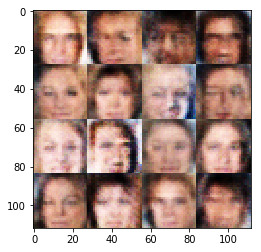

Steps 610/1... Discriminator Loss: 1.4840... Generator Loss: 0.7394
Steps 620/1... Discriminator Loss: 1.4519... Generator Loss: 0.7760
Steps 630/1... Discriminator Loss: 1.3590... Generator Loss: 0.8157
Steps 640/1... Discriminator Loss: 1.3781... Generator Loss: 0.8429
Steps 650/1... Discriminator Loss: 1.4673... Generator Loss: 0.8033
Steps 660/1... Discriminator Loss: 1.4099... Generator Loss: 0.7927
Steps 670/1... Discriminator Loss: 1.3528... Generator Loss: 0.8559
Steps 680/1... Discriminator Loss: 1.5303... Generator Loss: 0.7288
Steps 690/1... Discriminator Loss: 1.3909... Generator Loss: 0.7936
Steps 700/1... Discriminator Loss: 1.4760... Generator Loss: 0.7952


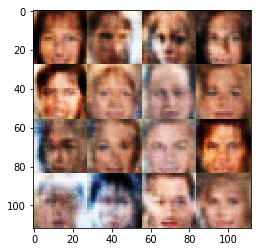

Steps 710/1... Discriminator Loss: 1.4095... Generator Loss: 0.7801
Steps 720/1... Discriminator Loss: 1.3551... Generator Loss: 0.8575
Steps 730/1... Discriminator Loss: 1.4795... Generator Loss: 0.7662
Steps 740/1... Discriminator Loss: 1.4266... Generator Loss: 0.7531
Steps 750/1... Discriminator Loss: 1.4391... Generator Loss: 0.7638
Steps 760/1... Discriminator Loss: 1.4254... Generator Loss: 0.7896
Steps 770/1... Discriminator Loss: 1.4769... Generator Loss: 0.7375
Steps 780/1... Discriminator Loss: 1.4220... Generator Loss: 0.7691
Steps 790/1... Discriminator Loss: 1.4090... Generator Loss: 0.7940
Steps 800/1... Discriminator Loss: 1.4170... Generator Loss: 0.7961


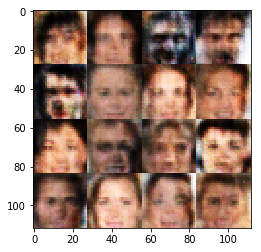

Steps 810/1... Discriminator Loss: 1.3812... Generator Loss: 0.7927
Steps 820/1... Discriminator Loss: 1.4137... Generator Loss: 0.7307
Steps 830/1... Discriminator Loss: 1.3817... Generator Loss: 0.8077
Steps 840/1... Discriminator Loss: 1.4274... Generator Loss: 0.7848
Steps 850/1... Discriminator Loss: 1.3797... Generator Loss: 0.8031
Steps 860/1... Discriminator Loss: 1.4207... Generator Loss: 0.7471
Steps 870/1... Discriminator Loss: 1.5342... Generator Loss: 0.7130
Steps 880/1... Discriminator Loss: 1.3929... Generator Loss: 0.8111
Steps 890/1... Discriminator Loss: 1.4351... Generator Loss: 0.7317
Steps 900/1... Discriminator Loss: 1.5129... Generator Loss: 0.6851


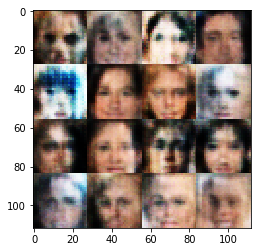

Steps 910/1... Discriminator Loss: 1.3704... Generator Loss: 0.8102
Steps 920/1... Discriminator Loss: 1.4240... Generator Loss: 0.7749
Steps 930/1... Discriminator Loss: 1.4527... Generator Loss: 0.7819
Steps 940/1... Discriminator Loss: 1.3739... Generator Loss: 0.8087
Steps 950/1... Discriminator Loss: 1.4702... Generator Loss: 0.7312
Steps 960/1... Discriminator Loss: 1.4669... Generator Loss: 0.8202
Steps 970/1... Discriminator Loss: 1.4021... Generator Loss: 0.7623
Steps 980/1... Discriminator Loss: 1.3870... Generator Loss: 0.8038
Steps 990/1... Discriminator Loss: 1.4337... Generator Loss: 0.8263
Steps 1000/1... Discriminator Loss: 1.4528... Generator Loss: 0.7154


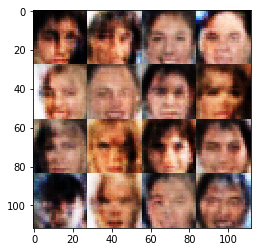

Steps 1010/1... Discriminator Loss: 1.4163... Generator Loss: 0.7806
Steps 1020/1... Discriminator Loss: 1.4327... Generator Loss: 0.7728
Steps 1030/1... Discriminator Loss: 1.4170... Generator Loss: 0.8079
Steps 1040/1... Discriminator Loss: 1.3856... Generator Loss: 0.8076
Steps 1050/1... Discriminator Loss: 1.4494... Generator Loss: 0.7867
Steps 1060/1... Discriminator Loss: 1.4174... Generator Loss: 0.8149
Steps 1070/1... Discriminator Loss: 1.3983... Generator Loss: 0.7789
Steps 1080/1... Discriminator Loss: 1.4748... Generator Loss: 0.7489
Steps 1090/1... Discriminator Loss: 1.4378... Generator Loss: 0.7353
Steps 1100/1... Discriminator Loss: 1.4532... Generator Loss: 0.7629


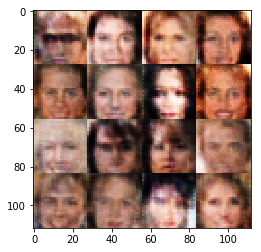

Steps 1110/1... Discriminator Loss: 1.4210... Generator Loss: 0.7850
Steps 1120/1... Discriminator Loss: 1.3645... Generator Loss: 0.8258
Steps 1130/1... Discriminator Loss: 1.5110... Generator Loss: 0.7450
Steps 1140/1... Discriminator Loss: 1.3954... Generator Loss: 0.7927
Steps 1150/1... Discriminator Loss: 1.3972... Generator Loss: 0.7869
Steps 1160/1... Discriminator Loss: 1.4596... Generator Loss: 0.7553
Steps 1170/1... Discriminator Loss: 1.3900... Generator Loss: 0.7484
Steps 1180/1... Discriminator Loss: 1.4116... Generator Loss: 0.8045
Steps 1190/1... Discriminator Loss: 1.4014... Generator Loss: 0.7750
Steps 1200/1... Discriminator Loss: 1.4318... Generator Loss: 0.7485


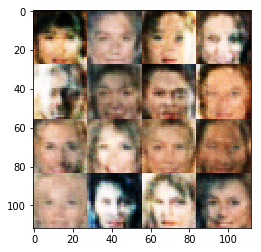

Steps 1210/1... Discriminator Loss: 1.3640... Generator Loss: 0.7777
Steps 1220/1... Discriminator Loss: 1.3972... Generator Loss: 0.8243
Steps 1230/1... Discriminator Loss: 1.4718... Generator Loss: 0.7675
Steps 1240/1... Discriminator Loss: 1.3997... Generator Loss: 0.7621
Steps 1250/1... Discriminator Loss: 1.3786... Generator Loss: 0.8150
Steps 1260/1... Discriminator Loss: 1.4342... Generator Loss: 0.7579
Steps 1270/1... Discriminator Loss: 1.4211... Generator Loss: 0.7927
Steps 1280/1... Discriminator Loss: 1.4224... Generator Loss: 0.7894
Steps 1290/1... Discriminator Loss: 1.3598... Generator Loss: 0.7868
Steps 1300/1... Discriminator Loss: 1.4171... Generator Loss: 0.8133


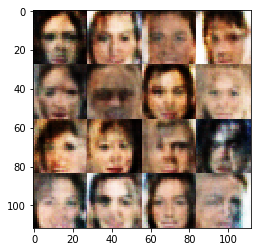

Steps 1310/1... Discriminator Loss: 1.3556... Generator Loss: 0.8054
Steps 1320/1... Discriminator Loss: 1.3547... Generator Loss: 0.8020
Steps 1330/1... Discriminator Loss: 1.4216... Generator Loss: 0.7586
Steps 1340/1... Discriminator Loss: 1.3800... Generator Loss: 0.7939
Steps 1350/1... Discriminator Loss: 1.3890... Generator Loss: 0.7485
Steps 1360/1... Discriminator Loss: 1.4058... Generator Loss: 0.7783
Steps 1370/1... Discriminator Loss: 1.4179... Generator Loss: 0.7246
Steps 1380/1... Discriminator Loss: 1.4364... Generator Loss: 0.7524
Steps 1390/1... Discriminator Loss: 1.4257... Generator Loss: 0.8134
Steps 1400/1... Discriminator Loss: 1.3653... Generator Loss: 0.7877


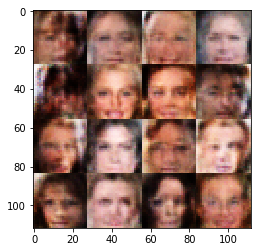

Steps 1410/1... Discriminator Loss: 1.3766... Generator Loss: 0.7531
Steps 1420/1... Discriminator Loss: 1.4493... Generator Loss: 0.7577
Steps 1430/1... Discriminator Loss: 1.4422... Generator Loss: 0.7209
Steps 1440/1... Discriminator Loss: 1.4337... Generator Loss: 0.7573
Steps 1450/1... Discriminator Loss: 1.3834... Generator Loss: 0.7545
Steps 1460/1... Discriminator Loss: 1.3999... Generator Loss: 0.7544
Steps 1470/1... Discriminator Loss: 1.4320... Generator Loss: 0.7617
Steps 1480/1... Discriminator Loss: 1.4054... Generator Loss: 0.7834
Steps 1490/1... Discriminator Loss: 1.3905... Generator Loss: 0.8036
Steps 1500/1... Discriminator Loss: 1.3981... Generator Loss: 0.7702


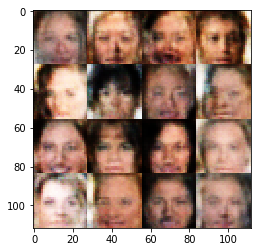

Steps 1510/1... Discriminator Loss: 1.4717... Generator Loss: 0.7067
Steps 1520/1... Discriminator Loss: 1.4468... Generator Loss: 0.7206
Steps 1530/1... Discriminator Loss: 1.3912... Generator Loss: 0.7948
Steps 1540/1... Discriminator Loss: 1.4222... Generator Loss: 0.7536
Steps 1550/1... Discriminator Loss: 1.4171... Generator Loss: 0.7773
Steps 1560/1... Discriminator Loss: 1.4245... Generator Loss: 0.7425
Steps 1570/1... Discriminator Loss: 1.3894... Generator Loss: 0.7657
Steps 1580/1... Discriminator Loss: 1.3898... Generator Loss: 0.8123
After epoch


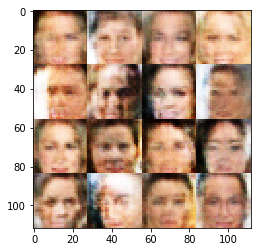

Done


In [77]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.